<a href="https://colab.research.google.com/github/INVERATE/projet_amazon/blob/main/Deep%20Learning/etape7.6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.sparse import load_npz
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd


X_train = load_npz("X_train_tfidf.npz").toarray()
Y_train = pd.read_csv("y_train.csv")['y_train']
X_test = load_npz("X_test_tfidf.npz").toarray()
Y_test = pd.read_csv("y_test.csv")['y_test']

# Vérification de la dimension d'entrée
input_dim = X_train.shape[1]  # nombre de colonnes = nombre de features TF-IDF


model = Sequential()
model.add(Dense(64, input_shape=(input_dim,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X_train, Y_train, epochs=10, batch_size=10)


_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy * 100))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0925 - loss: -0.3478
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1045 - loss: -12.8185
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0908 - loss: -59.3896
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1144 - loss: -174.3521
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0900 - loss: -393.3321
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1241 - loss: -725.8835
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1003 - loss: -1268.6687
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1117 - loss: -1914.9833
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1054 - loss: -2828.2754
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0961 - loss: -4017.3496
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0662 - loss: -5288.5356  
Accuracy: 6.97


# 2 couches de 64 puis 32 neurones


In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from scipy.sparse import load_npz
import numpy as np
from sklearn.metrics import f1_score
import pickle

# Encodage
X_train = load_npz("X_train_tfidf.npz").toarray()
Y_train = pd.read_csv("y_train.csv")['y_train']
X_test = load_npz("X_test_tfidf.npz").toarray()
Y_test = pd.read_csv("y_test.csv")['y_test']
Y_train_cat = to_categorical(Y_train - 1, num_classes=5)
Y_test_cat  = to_categorical(Y_test  - 1, num_classes=5)

input_dim = X_train.shape[1]

model = Sequential([
    Dense(64, input_shape=(input_dim,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['categorical_accuracy']
)

model.fit(X_train, Y_train_cat, epochs=10, batch_size=32,
          validation_split=0.1)

_, accuracy = model.evaluate(X_test, Y_test_cat)
print(f'Multi-class accuracy: {accuracy:.2%}')


with open('deep_simple.pkl', 'wb') as f:
    pickle.dump(model, f)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - categorical_accuracy: 0.5395 - loss: 1.5622 - val_categorical_accuracy: 0.6625 - val_loss: 1.3416
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.6273 - loss: 1.2715 - val_categorical_accuracy: 0.6625 - val_loss: 1.0601
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - categorical_accuracy: 0.6531 - loss: 1.0285 - val_categorical_accuracy: 0.6625 - val_loss: 1.0277
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.6423 - loss: 0.9518 - val_categorical_accuracy: 0.6625 - val_loss: 0.9984
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.6146 - loss: 0.8914 - val_categorical_accuracy: 0.6625 - val_loss: 0.9687
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.6726 - loss: 0.6803 - val_categorical_accuracy: 0.6750 - val_loss: 0.9477
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.7598 - loss: 0.56

# Optimisation du modèle

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from scipy.sparse import load_npz
import numpy as np
from tensorflow.keras.optimizers import Adam, RMSprop, Adamax, Nadam, Lion
from sklearn.metrics import classification_report
import pickle
# Encodage
X_train = load_npz("X_train_tfidf.npz").toarray()
Y_train = pd.read_csv("y_train.csv")['y_train']
X_test = load_npz("X_test_tfidf.npz").toarray()
Y_test = pd.read_csv("y_test.csv")['y_test']
Y_train_cat = to_categorical(Y_train - 1, num_classes=5)
Y_test_cat  = to_categorical(Y_test  - 1, num_classes=5)

input_dim = X_train.shape[1]

model = Sequential([
    Dense(128, input_shape=(input_dim,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.00099),
    #optimizer=Nadam(learning_rate=0.0009),
    metrics=['categorical_accuracy']
)

model.fit(X_train, Y_train_cat, epochs=10, batch_size=32,
          validation_split=0.1)

_, accuracy = model.evaluate(X_test, Y_test_cat)
print(f'Multi-class accuracy: {accuracy:.2%}')


with open('deep_simple_opti.pkl', 'wb') as f:
    pickle.dump(model, f)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - categorical_accuracy: 0.5007 - loss: 1.5420 - val_categorical_accuracy: 0.6625 - val_loss: 1.2004
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - categorical_accuracy: 0.6286 - loss: 1.1610 - val_categorical_accuracy: 0.6625 - val_loss: 1.0373
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - categorical_accuracy: 0.6344 - loss: 0.9776 - val_categorical_accuracy: 0.6625 - val_loss: 0.9859
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - categorical_accuracy: 0.6367 - loss: 0.7932 - val_categorical_accuracy: 0.6750 - val_loss: 0.9452
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - categorical_accuracy: 0.7564 - loss: 0.5864 - val_categorical_accuracy: 0.7000 - val_loss: 0.9568
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - categorical_accuracy: 0.9051 - loss: 0.3929 - val_categorical_accuracy: 0.7000 - val_loss: 0.9808
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - categorical_accuracy: 0.9910 - loss: 0.2492 - val_ca

En ajoutant des couches (5 avec 128 --> 12) l'accuracy diminue (64%).
En augmentant à 0.1 le learning rate l'accuracy diminue diminue aussi (51%) , avec O.5, 0.99, 0.00099 l'accuracy diminue moins (66%). 0.02 ---> 62%.

Diminution du learning rate ! augmentation de l'accuarcy.
0.00099-->68.66%
0.0009-->69.14%

La modification du learning rate ne change pas grand chose.

Optimizer RMSprop, Nadam même résultat
Nadam 0.0009 ---> 69.15% !!
Adamax, Lion moins bien (66%, 62%)

# Etape 6


# Découpage de x train x test

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import save_npz
import pickle

# Charger les données
df = pd.read_csv("Reviews_clean_lemmatized_short.csv")
texts = df['Text_without_stopwords']
y = df['Score']

X_train, X_test, y_train, y_test = train_test_split(texts, y, test_size=0.2, random_state=42)

# Sauvegarde
pd.DataFrame({'y_train': y_train}).to_csv('y_train.csv', index=False)
pd.DataFrame({'y_test': y_test}).to_csv('y_test.csv', index=False)
pd.DataFrame({'X_train': X_train}).to_csv('X_train.csv', index=False)
pd.DataFrame({'X_test': X_test}).to_csv('X_test.csv', index=False)



# Couche de Word embedding avec tokenisation dans deep learning simple

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Nadam, Adam
import pickle
from sklearn.metrics import classification_report

# Charger les textes
text = pd.read_csv("Reviews_clean.csv")["Text_without_stopwords"]

# Initialiser le tokenizer
vocab_size = 10000  # ajustable selon ton vocabulaire réel
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(text)

# Convertir les textes en séquences d’indices
sequences = tokenizer.texts_to_sequences(text)

# Padding des séquences
max_length = 100  # fixez une taille fixe
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

X = padded_sequences
Y = pd.read_csv("Reviews_clean.csv")["Score"]

# 3) Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 4) One-hot encoding
Y_train_cat = to_categorical(Y_train-1, num_classes=5)
Y_test_cat = to_categorical(Y_test-1, num_classes=5)


#Y_train = pd.read_csv("y_train.csv")['y_train']
#Y_test = pd.read_csv("y_test.csv")['y_test']

#Y_train_cat = to_categorical(Y_train - 1, num_classes=5)
#Y_test_cat  = to_categorical(Y_test  - 1, num_classes=5)

#X_train = padded_sequences[:len(Y_train_cat)]
#X_test  = padded_sequences[len(Y_train_cat):len(Y_train_cat)+len(Y_test_cat)]

embedding_dim = 64

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0009),
    metrics=['categorical_accuracy']
)


model.fit(X_train, Y_train_cat, epochs=10, batch_size=32, validation_split=0.1)

_, accuracy = model.evaluate(X_test, Y_test_cat)


with open('deep_simple_embedding.pkl', 'wb') as f:
    pickle.dump(model, f)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
12791/12791 ━━━━━━━━━━━━━━━━━━━━ 165s 13ms/step - categorical_accuracy: 0.6937 - loss: 0.8444 - val_categorical_accuracy: 0.7366 - val_loss: 0.7080
Epoch 2/10
12791/12791 ━━━━━━━━━━━━━━━━━━━━ 163s 13ms/step - categorical_accuracy: 0.7434 - loss: 0.6902 - val_categorical_accuracy: 0.7413 - val_loss: 0.7011
Epoch 3/10
12791/12791 ━━━━━━━━━━━━━━━━━━━━ 162s 13ms/step - categorical_accuracy: 0.7592 - loss: 0.6514 - val_categorical_accuracy: 0.7448 - val_loss: 0.7030
Epoch 4/10
12791/12791 ━━━━━━━━━━━━━━━━━━━━ 161s 13ms/step - categorical_accuracy: 0.7732 - loss: 0.6160 - val_categorical_accuracy: 0.7547 - val_loss: 0.6968
Epoch 5/10
12791/12791 ━━━━━━━━━━━━━━━━━━━━ 159s 12ms/step - categorical_accuracy: 0.7875 - loss: 0.5831 - val_categorical_accuracy: 0.7556 - val_loss: 0.6872
Epoch 6/10
12791/12791 ━━━━━━━━━━━━━━━━━━━━ 206s 13ms/step - categorical_accuracy: 0.8007 - loss: 0.5508 - val_categorical_accuracy: 0.7651 - val_loss: 0.6730
Epoch 7/10
12791/12791 ━━━━━━━━━━━━━━━━━━━━ 20

# Glove avec Deep Learning simple

In [ ]:
# code for Glove word embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Nadam, Adam
import pickle
from sklearn.metrics import classification_report

x = pd.read_csv("Reviews_clean.csv")["Text_without_stopwords"]

# create the dict.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

# number of unique words in dict.
print("Number of unique words in dictionary=",
      len(tokenizer.word_index))
print("Dictionary is = ", tokenizer.word_index)

# download glove and unzip it in Notebook.
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove*.zip

# vocab: 'the': 1, mapping of words with
# integers in seq. 1,2,3..
# embedding: 1->dense vector
def embedding_for_vocab(filepath, word_index,
                        embedding_dim):
    vocab_size = len(word_index) + 1

    # Adding again 1 because of reserved 0 index
    embedding_matrix_vocab = np.zeros((vocab_size,
                                       embedding_dim))

    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix_vocab[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix_vocab


# matrix for vocab: word_index
embedding_dim = 100
embedding_matrix_vocab = embedding_for_vocab(
    'glove.6B.100d.txt', tokenizer.word_index,
  embedding_dim)

print("Dense vector for first word is => ",
      embedding_matrix_vocab[1])

max_length = 100  # fixez une taille fixe
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

X = padded_sequences
Y = pd.read_csv("Reviews_clean.csv")["Score"]

# 3) Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 4) One-hot encoding
Y_train_cat = to_categorical(Y_train-1, num_classes=5)
Y_test_cat = to_categorical(Y_test-1, num_classes=5)


#Y_train = pd.read_csv("y_train.csv")['y_train']
#Y_test = pd.read_csv("y_test.csv")['y_test']

#Y_train_cat = to_categorical(Y_train - 1, num_classes=5)
#Y_test_cat  = to_categorical(Y_test  - 1, num_classes=5)

#X_train = embedding_matrix_vocab[:len(Y_train_cat)]
#X_test  = embedding_matrix_vocab[len(Y_train_cat):len(Y_train_cat)+len(Y_test_cat)]

embedding_dim = 64

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=Nadam(learning_rate=0.0009),
    metrics=['categorical_accuracy']
)


model.fit(X_train, Y_train_cat, epochs=10, batch_size=32, validation_split=0.1)

_, accuracy = model.evaluate(X_test, Y_test_cat)

with open('deep_simple_glove.pkl', 'wb') as f:
    pickle.dump(model, f)

Number of unique words in dictionary= 124870
Dictionary is =  {'the': 1, 'i': 2, 'a': 3, 'it': 4, 'to': 5, 'of': 6, 'is': 7, 'this': 8, 'for': 9, 'in': 10, 'that': 11, 'but': 12, 'you': 13, 'with': 14, 'not': 15, 'was': 16, 'they': 17, "n't": 18, "'s": 19, 'as': 20, 'on': 21, 'so': 22, 'like': 23, 'good': 24, 'be': 25, 'or': 26, 'at': 27, 'one': 28, 'just': 29, 'taste': 30, 'do': 31, 'if': 32, 'product': 33, 'very': 34, 'great': 35, 'coffee': 36, 'all': 37, 'flavor': 38, 'from': 39, 'we': 40, 'tea': 41, 'when': 42, 'more': 43, 'would': 44, 'me': 45, 'had': 46, 'food': 47, 'love': 48, 'will': 49, 'out': 50, 'than': 51, 'no': 52, 'get': 53, 'other': 54, 'amazon': 55, 'some': 56, 'up': 57, 'about': 58, 'really': 59, 'only': 60, 'too': 61, 'much': 62, 'an': 63, 'there': 64, 'your': 65, 'also': 66, 'because': 67, "'ve": 68, 'use': 69, 'were': 70, 'little': 71, 'what': 72, 'which': 73, 'did': 74, 'she': 75, 'he': 76, 'buy': 77, 'best': 78, 'price': 79, 'by': 80, 'even': 81, 'does': 82, "'m":

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
12791/12791 ━━━━━━━━━━━━━━━━━━━━ 252s 19ms/step - categorical_accuracy: 0.6976 - loss: 0.8302 - val_categorical_accuracy: 0.7334 - val_loss: 0.7159
Epoch 2/10
12791/12791 ━━━━━━━━━━━━━━━━━━━━ 267s 20ms/step - categorical_accuracy: 0.7450 - loss: 0.6855 - val_categorical_accuracy: 0.7447 - val_loss: 0.6959
Epoch 3/10
12791/12791 ━━━━━━━━━━━━━━━━━━━━ 255s 20ms/step - categorical_accuracy: 0.7608 - loss: 0.6471 - val_categorical_accuracy: 0.7472 - val_loss: 0.6934
Epoch 4/10
12791/12791 ━━━━━━━━━━━━━━━━━━━━ 258s 20ms/step - categorical_accuracy: 0.7761 - loss: 0.6089 - val_categorical_accuracy: 0.7558 - val_loss: 0.6709
Epoch 5/10
12791/12791 ━━━━━━━━━━━━━━━━━━━━ 263s 20ms/step - categorical_accuracy: 0.7881 - loss: 0.5809 - val_categorical_accuracy: 0.7559 - val_loss: 0.6823
Epoch 6/10
 7750/12791 ━━━━━━━━━━━━━━━━━━━━ 1:36 19ms/step - categorical_accuracy: 0.8009 - loss: 0.5472

KeyboardInterrupt: 

# Matrice pour glove

Poids de classes : {0: np.float64(2.1685327356826094), 1: np.float64(3.8033202308271306), 2: np.float64(2.66293661250183), 3: np.float64(1.409418583028575), 4: np.float64(0.31339190958583146)}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
12791/12791 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - categorical_accuracy: 0.4791 - loss: 1.4310 - val_categorical_accuracy: 0.5753 - val_loss: 1.1358
Epoch 2/10
12791/12791 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - categorical_accuracy: 0.5128 - loss: 1.3373 - val_categorical_accuracy: 0.4937 - val_loss: 1.2628
Epoch 3/10
12791/12791 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - categorical_accuracy: 0.5191 - loss: 1.3304 - val_categorical_accuracy: 0.5266 - val_loss: 1.2305
Epoch 4/10
12791/12791 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - categorical_accuracy: 0.5202 - loss: 1.3247 - val_categorical_accuracy: 0.5516 - val_loss: 1.1459
Epoch 5/10
12791/12791 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - categorical_accuracy: 0.5228 - loss: 1.3179 - val_categorical_accuracy: 0.4828 - val_loss: 1.3166
Epoch 6/10
12791/12791 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - categorical_accuracy: 0.5239 - loss: 1.3114 - val_categorical_accuracy: 0.5791 - val_loss: 1.1035
Epoch 7/10
12791/12791 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step -

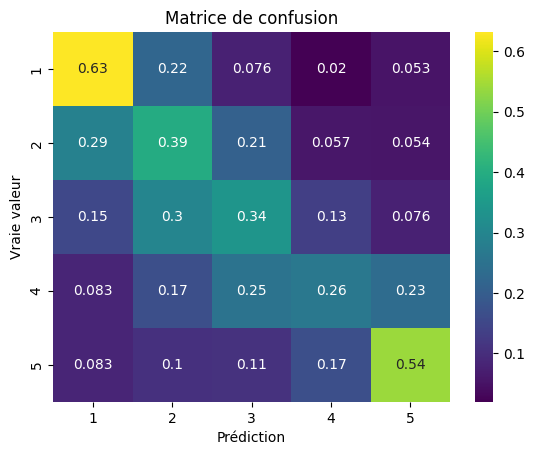

In [4]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.optimizers import Nadam

# 1) Charger les données
df = pd.read_csv("Reviews_clean.csv")
texts = df["Text_without_stopwords"]
labels = df["Score"]

# 2) Tokenisation
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# 3) Padding
max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# 4) Encodage des labels
Y = labels
Y_cat = to_categorical(Y - 1, num_classes=5)  # Score de 1 à 5 → classes 0 à 4

# 5) Split train/test
X_train, X_test, Y_train, Y_test = train_test_split(
    padded_sequences, Y_cat, test_size=0.2, random_state=42
)

# 6) Calcul des poids de classes
Y_train_int = np.argmax(Y_train, axis=1)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(Y_train_int),
    y=Y_train_int
)
class_weight_dict = dict(enumerate(class_weights))
print("Poids de classes :", class_weight_dict)

# 7) Charger les embeddings GloVe
def load_glove_embeddings(filepath, word_index, embedding_dim=100):
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open(filepath, encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = vector
    return embedding_matrix

embedding_dim = 100
embedding_matrix = load_glove_embeddings("glove.6B.100d.txt", tokenizer.word_index, embedding_dim)

# 8) Construire le modèle
model = Sequential([
    Embedding(
        input_dim=embedding_matrix.shape[0],
        output_dim=embedding_matrix.shape[1],
        weights=[embedding_matrix],
        input_length=max_length,
        trainable=False  # changer en True pour fine-tuning
    ),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

# 9) Compilation
model.compile(
    loss='categorical_crossentropy',
    optimizer=Nadam(learning_rate=0.0009),
    metrics=['categorical_accuracy']
)

# 10) Entraînement
model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    class_weight=class_weight_dict
)

# 11) Évaluation
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"\nAccuracy: {accuracy:.2%}")

# 12) Sauvegarde du modèle
with open('deep_simple_glove.pkl', 'wb') as f:
    pickle.dump(model, f)

# 13) Prédictions et évaluation
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1) + 1  # Pour coller aux scores 1 à 5
y_true = np.argmax(Y_test, axis=1) + 1

print("\nClassification Report :\n")
print(classification_report(y_true, y_pred, digits=2))

# 14) Matrice de confusion
cm = confusion_matrix(y_true, y_pred, labels=[1, 2, 3, 4, 5], normalize='true')
sns.heatmap(cm, annot=True, cmap="viridis", xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel("Prédiction")
plt.ylabel("Vraie valeur")
plt.title("Matrice de confusion")
plt.savefig("confusion_matrix_glove.png")
plt.show()


# Deep Learning récurrent avec Word Embeddings

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Nadam, Adam
import pickle
from sklearn.metrics import classification_report
# Charger les textes
text = pd.read_csv("Reviews_clean.csv")["Text_without_stopwords"]

# Initialiser le tokenizer
vocab_size = 10000  # ajustable selon ton vocabulaire réel
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(text)

# Convertir les textes en séquences d’indices
sequences = tokenizer.texts_to_sequences(text)

# Padding des séquences
max_length = 100  # fixez une taille fixe
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

X = padded_sequences
Y = pd.read_csv("Reviews_clean.csv")["Score"]

# 3) Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 4) One-hot encoding
Y_train_cat = to_categorical(Y_train-1, num_classes=5)
Y_test_cat = to_categorical(Y_test-1, num_classes=5)


#Y_train = pd.read_csv("y_train.csv")['y_train']
#Y_test = pd.read_csv("y_test.csv")['y_test']

#Y_train_cat = to_categorical(Y_train - 1, num_classes=5)
#Y_test_cat  = to_categorical(Y_test  - 1, num_classes=5)

#X_train = padded_sequences[:len(Y_train_cat)]
#X_test  = padded_sequences[len(Y_train_cat):len(Y_train_cat)+len(Y_test_cat)]

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding

model = Sequential()

# Embedding layer
model.add(
    Embedding(input_dim=10000,
              input_length = 64,
              output_dim=100,

              trainable=True,
              mask_zero=True))

# Masking layer for pre-trained embeddings
model.add(Masking(mask_value=0.0))

# Recurrent layer
model.add(LSTM(64, return_sequences=False,
               dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train,  Y_train_cat,
                    batch_size=2048, epochs=10,
                    validation_data=(X_test, Y_test_cat))
_, accuracy = model.evaluate(X_test, Y_test_cat)


with open('deep_recurrent.pkl', 'wb') as f:
    pickle.dump(model, f)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


223/223 ━━━━━━━━━━━━━━━━━━━━ 372s 2s/step - accuracy: 0.6174 - loss: 1.2099 - val_accuracy: 0.6389 - val_loss: 1.0560
Epoch 2/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - accuracy: 0.6369 - loss: 1.0874 - val_accuracy: 0.6475 - val_loss: 1.0361
Epoch 3/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 381s 2s/step - accuracy: 0.6479 - loss: 1.0275 - val_accuracy: 0.6845 - val_loss: 0.8400
Epoch 4/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 371s 2s/step - accuracy: 0.6872 - loss: 0.8448 - val_accuracy: 0.6976 - val_loss: 0.7931
Epoch 5/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.6980 - loss: 0.8000 - val_accuracy: 0.7044 - val_loss: 0.7725
Epoch 6/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - accuracy: 0.7057 - loss: 0.7708 - val_accuracy: 0.7187 - val_loss: 0.7462
Epoch 7/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.7197 - loss: 0.7370 - val_accuracy: 0.7243 - val_loss: 0.7217
Epoch 8/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 364s 2s/step - accuracy: 0.7261 - loss: 0.7198 - val_accuracy: 0.729

In [ ]:
with open('deep_recurrent.pkl', 'wb') as f:
    pickle.dump(model, f)